In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataVer10 = "review-Vermont-10.json.gz"
dataVer = "review-Vermont.json.gz"
dataMeta = "meta-Vermont.json.gz"

df_meta = pd.read_json(dataMeta, lines=True, compression="gzip")
df_ver = pd.read_json(dataVer, lines=True, compression="gzip")

In [3]:
#merge into one dataframe
df = df_ver.merge(df_meta, on="gmap_id", how="left")

print("Before removing missing text:", len(df))

df = df.dropna(subset=["text"])

print("After removing missing text:", len(df))

print("Before removing duplicates:", len(df))

df = df.drop_duplicates(subset=['user_id', 'gmap_id'])

print("After removing duplicates:", len(df))

Before removing missing text: 853549
After removing missing text: 508108
Before removing duplicates: 508108
After removing duplicates: 488212
After removing duplicates: 488212


In [4]:
df.head()

,user_id,name_x,time,rating,text,pics,resp,gmap_id,name_y,address,...,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,1.044905e+20,Tia McCarthy,1629987079369,5.0,The Royal Group recently performed standard te...,None,"{'time': 1629988531658, 'text': 'Tia, You rock...",0x89e02445cb9db457:0x37f42bff4edf7a43,Royal Group,"Royal Group, 150 Woodstock Ave, Rutland, VT 05701",...,-72.960497,"[Security system supplier, Fire protection equ...",4.9,148,None,"[[Thursday, 8AM–5PM], [Friday, 8AM–5PM], [Satu...",{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 8AM,"[0x89e0245c4c5c7d2d:0x97bca40a0223d767, 0x89e0...",https://www.google.com/maps/place//data=!4m2!3...
2,1.120627e+20,Rochelle Weitzner,1626442303453,5.0,I can't say enough great things about The Roya...,None,"{'time': 1626444234168, 'text': 'Morning Roche...",0x89e02445cb9db457:0x37f42bff4edf7a43,Royal Group,"Royal Group, 150 Woodstock Ave, Rutland, VT 05701",...,-72.960497,"[Security system supplier, Fire protection equ...",4.9,148,None,"[[Thursday, 8AM–5PM], [Friday, 8AM–5PM], [Satu...",{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 8AM,"[0x89e0245c4c5c7d2d:0x97bca40a0223d767, 0x89e0...",https://www.google.com/maps/place//data=!4m2!3...
4,1.100483e+20,Baxter Holland,1627319568225,5.0,The Royal Group has done work for us over many...,None,"{'time': 1627319913364, 'text': 'Baxter, I tr...",0x89e02445cb9db457:0x37f42bff4edf7a43,Royal Group,"Royal Group, 150 Woodstock Ave, Rutland, VT 05701",...,-72.960497,"[Security system supplier, Fire protection equ...",4.9,148,None,"[[Thursday, 8AM–5PM], [Friday, 8AM–5PM], [Satu...",{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 8AM,"[0x89e0245c4c5c7d2d:0x97bca40a0223d767, 0x89e0...",https://www.google.com/maps/place//data=!4m2!3...
6,1.061744e+20,Jack Droppa,1625223629975,5.0,The Royal Group was fantastic to work with. I ...,None,"{'time': 1625224706775, 'text': 'Morning Jack,...",0x89e02445cb9db457:0x37f42bff4edf7a43,Royal Group,"Royal Group, 150 Woodstock Ave, Rutland, VT 05701",...,-72.960497,"[Security system supplier, Fire protection equ...",4.9,148,None,"[[Thursday, 8AM–5PM], [Friday, 8AM–5PM], [Satu...",{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 8AM,"[0x89e0245c4c5c7d2d:0x97bca40a0223d767, 0x89e0...",https://www.google.com/maps/place//data=!4m2!3...
8,1.062387e+20,Ty Danco,1630520930973,5.0,"Have used in different houses, installing mult...",None,"{'time': 1630521923452, 'text': 'Thanks so muc...",0x89e02445cb9db457:0x37f42bff4edf7a43,Royal Group,"Royal Group, 150 Woodstock Ave, Rutland, VT 05701",...,-72.960497,"[Security system supplier, Fire protection equ...",4.9,148,None,"[[Thursday, 8AM–5PM], [Friday, 8AM–5PM], [Satu...",{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 8AM,"[0x89e0245c4c5c7d2d:0x97bca40a0223d767, 0x89e0...",https://www.google.com/maps/place//data=!4m2!3...


In [5]:
# Delete unnecessary columns : name_x, name_y, time, pics, resp, address, relative_results, state, url, latitude, longitude
# Maybe delete : description, num_of_reviews
# ** avg_rating should be recalculated **

useless = ["name_x", "name_y", "time", "pics", "resp", "address", "relative_results", "state", "url", "latitude", "longitude"]
maybe = ["description", "num_of_reviews"]
df = df.drop(columns=useless + maybe)

In [6]:
df.head()

,user_id,rating,text,gmap_id,category,avg_rating,price,hours,MISC
0,1.044905e+20,5.0,The Royal Group recently performed standard te...,0x89e02445cb9db457:0x37f42bff4edf7a43,"[Security system supplier, Fire protection equ...",4.9,None,"[[Thursday, 8AM–5PM], [Friday, 8AM–5PM], [Satu...",{'Accessibility': ['Wheelchair accessible entr...
2,1.120627e+20,5.0,I can't say enough great things about The Roya...,0x89e02445cb9db457:0x37f42bff4edf7a43,"[Security system supplier, Fire protection equ...",4.9,None,"[[Thursday, 8AM–5PM], [Friday, 8AM–5PM], [Satu...",{'Accessibility': ['Wheelchair accessible entr...
4,1.100483e+20,5.0,The Royal Group has done work for us over many...,0x89e02445cb9db457:0x37f42bff4edf7a43,"[Security system supplier, Fire protection equ...",4.9,None,"[[Thursday, 8AM–5PM], [Friday, 8AM–5PM], [Satu...",{'Accessibility': ['Wheelchair accessible entr...
6,1.061744e+20,5.0,The Royal Group was fantastic to work with. I ...,0x89e02445cb9db457:0x37f42bff4edf7a43,"[Security system supplier, Fire protection equ...",4.9,None,"[[Thursday, 8AM–5PM], [Friday, 8AM–5PM], [Satu...",{'Accessibility': ['Wheelchair accessible entr...
8,1.062387e+20,5.0,"Have used in different houses, installing mult...",0x89e02445cb9db457:0x37f42bff4edf7a43,"[Security system supplier, Fire protection equ...",4.9,None,"[[Thursday, 8AM–5PM], [Friday, 8AM–5PM], [Satu...",{'Accessibility': ['Wheelchair accessible entr...


In [7]:
print("Before:", len(df))
df = df.dropna(subset=['rating'])
print("After:", len(df))

Before: 488212
After: 488052


In [8]:
df.to_csv("merged.csv", index=False)

Index([1.0, 2.0, 3.0, 4.0, 5.0], dtype='float64', name='rating')


<function matplotlib.pyplot.show(close=None, block=None)>

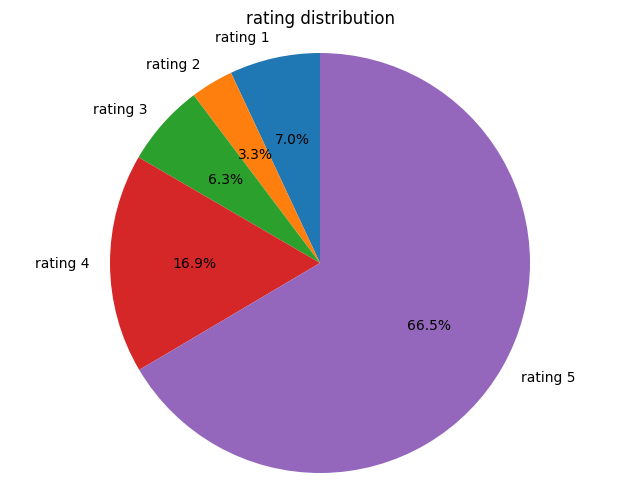

In [9]:
labels = df['rating'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
print(labels.index)
plt.pie(labels.values, labels=["rating 1", "rating 2", "rating 3", "rating 4", "rating 5"], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('rating distribution')
plt.show

In [10]:
import pandas as pd
import numpy as np
import ast
import json
from collections import defaultdict
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
### baseline

df = pd.read_csv("merged.csv", usecols=['user_id', 'rating', 'gmap_id'])

# Clean and prepare data
df = df.dropna(subset=['user_id', 'rating', 'gmap_id'])
df['rating'] = df['rating'].astype(float)

# Train/Test split
train, test = train_test_split(
    df, test_size=0.2, random_state=42, stratify=df['rating']
)

print(f"Train size: {len(train)}, Test size: {len(test)}")

# Baseline 1: Global Mean
# Simply predict the average rating across all training examples
global_mean = train['rating'].mean()
print(f"Global Mean: {global_mean:.4f}")

# Make predictions (predict global mean for all test examples)
preds_global = [global_mean] * len(test)

# Evaluate
mse_global = mean_squared_error(test['rating'], preds_global)
# Convert predictions to integers 1-5 for accuracy calculation
preds_global_int = [min(5, max(1, int(round(p)))) for p in preds_global]
acc_global = accuracy_score(test['rating'], preds_global_int)

print(f"Global Mean - MSE: {mse_global:.4f}, Accuracy: {acc_global:.4f}")

# Baseline 2: Regularized Item Bias (μ + bᵢ)
# Predict global mean plus a regularized item bias
# Formula: r̂ᵢⱼ = μ + bᵢ, where bᵢ = (Σ(rᵢⱼ - μ)) / (nᵢ + λ)
# nᵢ is the number of ratings for item i, λ is regularization parameter
global_mean = train['rating'].mean()
lambda_reg = 25  # Regularization parameter

# Compute regularized item biases more efficiently
item_stats = train.groupby('gmap_id').agg({
    'rating': ['sum', 'count']
}).reset_index()
item_stats.columns = ['gmap_id', 'rating_sum', 'n_i']

# Calculate bias: bᵢ = (Σ(rᵢⱼ - μ)) / (nᵢ + λ) = (Σrᵢⱼ - nᵢ*μ) / (nᵢ + λ)
item_stats['bias'] = (item_stats['rating_sum'] - item_stats['n_i'] * global_mean) / (item_stats['n_i'] + lambda_reg)
item_bias_dict = dict(zip(item_stats['gmap_id'], item_stats['bias']))

# Make predictions: r̂ = μ + bᵢ
preds_reg_item = []
for gmap_id in test['gmap_id']:
    if gmap_id in item_bias_dict:
        pred = global_mean + item_bias_dict[gmap_id]
    else:
        # For unseen items, use global mean (bias = 0)
        pred = global_mean
    preds_reg_item.append(pred)

# Evaluate
mse_reg_item = mean_squared_error(test['rating'], preds_reg_item)
preds_reg_item_int = [min(5, max(1, int(round(p)))) for p in preds_reg_item]
acc_reg_item = accuracy_score(test['rating'], preds_reg_item_int)

print(f"Regularized Item Bias (λ={lambda_reg}) - MSE: {mse_reg_item:.4f}, Accuracy: {acc_reg_item:.4f}")

Train size: 390441, Test size: 97611
Global Mean: 4.3265
Global Mean - MSE: 1.3808, Accuracy: 0.1689
Regularized Item Bias (λ=25) - MSE: 1.2103, Accuracy: 0.3948
Regularized Item Bias (λ=25) - MSE: 1.2103, Accuracy: 0.3948


In [ ]:
from sklearn.svm import LinearSVC

df = pd.read_csv("merged.csv", usecols=['text', 'rating'])
df = df.dropna(subset=['text', 'rating'])
df['text'] = df['text'].astype(str)

df['rating'] = df['rating'].round().astype(int)


X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['rating'], test_size=0.2, random_state=42, stratify=df['rating']
)

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")
print(f"Rating classes: {sorted(df['rating'].unique())}")

tfidf = TfidfVectorizer(
    max_features=None,
    stop_words='english',
    ngram_range=(1, 3),  # unigram - trigram
    min_df=2,  # Ignore terms that appear in fewer than 2 documents
    max_df=0.8,  # Ignore terms that appear in more than 95% of documents
    sublinear_tf=True,
    use_idf=True,
    smooth_idf=True,
    norm='l2'
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(f"TF-IDF feature shape: {X_train_tfidf.shape}")
print(f"Vocabulary size: {len(tfidf.vocabulary_)}")


model_svc = LinearSVC(C=1.0, max_iter=1000, random_state=42)
model_svc.fit(X_train_tfidf, y_train)


y_pred_svc = model_svc.predict(X_test_tfidf)


mse_svc = mean_squared_error(y_test, y_pred_svc)
acc_svc = accuracy_score(y_test, y_pred_svc)

print(f"Text-based Model (LinearSVC) - MSE: {mse_svc:.4f}, Accuracy: {acc_svc:.4f}")

Train size: 390440, Test size: 97610
Rating classes: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]
TF-IDF feature shape: (390440, 779937)
Vocabulary size: 779937
TF-IDF feature shape: (390440, 779937)
Vocabulary size: 779937
Text-based Model (LinearSVC) - MSE: 0.6693, Accuracy: 0.7309
Text-based Model (LinearSVC) - MSE: 0.6693, Accuracy: 0.7309


In [ ]:
from sklearn.svm import LinearSVR


df = pd.read_csv("merged.csv", usecols=['text', 'rating'])
df = df.dropna(subset=['text', 'rating'])
df['text'] = df['text'].astype(str)
df['rating'] = df['rating'].astype(float) 


X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['rating'], test_size=0.2, random_state=42, stratify=df['rating'].round()
)

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")


tfidf = TfidfVectorizer(
    max_features=None,
    stop_words='english',
    ngram_range=(1, 3),  # unigram - trigram
    min_df=2,  # Ignore terms that appear in fewer than 2 documents
    max_df=0.8,  # Ignore terms that appear in more than 95% of documents
    sublinear_tf=True,
    smooth_idf=True,
    norm='l2'
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(f"TF-IDF feature shape: {X_train_tfidf.shape}")


model_svr = LinearSVR(epsilon=0.0, C=1.0, max_iter=1000, random_state=42)
model_svr.fit(X_train_tfidf, y_train)


y_pred_svr = model_svr.predict(X_test_tfidf)
y_pred_svr = np.clip(y_pred_svr, 1, 5)
y_pred_svr_int = np.clip(np.round(y_pred_svr), 1, 5)


mse_svr = mean_squared_error(y_test, y_pred_svr)
acc_svr = accuracy_score(y_test, y_pred_svr_int)

print(f"\nLinearSVR (Regression) - MSE: {mse_svr:.4f}, Accuracy: {acc_svr:.4f}")
print(f"Previous LinearSVC (Classification) - MSE: {mse_svc:.4f}, Accuracy: {acc_svc:.4f}")
print(f"Improvement: {mse_svc - mse_svr:.4f} MSE reduction")

Train size: 390440, Test size: 97610
TF-IDF feature shape: (390440, 779937)
TF-IDF feature shape: (390440, 779937)

LinearSVR (Regression) - MSE: 0.5414, Accuracy: 0.6689
Previous LinearSVC (Classification) - MSE: 0.6693, Accuracy: 0.7309
Improvement: 0.1279 MSE reduction

LinearSVR (Regression) - MSE: 0.5414, Accuracy: 0.6689
Previous LinearSVC (Classification) - MSE: 0.6693, Accuracy: 0.7309
Improvement: 0.1279 MSE reduction


In [ ]:
# DistilBERT for Rating Prediction
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import mean_squared_error, accuracy_score
import pandas as pd

# Load data
df = pd.read_csv("merged.csv", usecols=['text', 'rating'])
df = df.dropna(subset=['text', 'rating'])
df['text'] = df['text'].astype(str)
df['rating'] = df['rating'].astype(float)

# Train/Test split
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['text'].tolist(), 
    df['rating'].tolist(), 
    test_size=0.2, 
    random_state=42, 
    stratify=df['rating'].round()
)

print(f"Train size: {len(train_texts)}, Test size: {len(test_texts)}")

# Tokenization
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

def tokenize_function(texts):
    return tokenizer(texts, padding="max_length", truncation=True, max_length=128)

print("Tokenizing data...")
train_encodings = tokenize_function(train_texts)
test_encodings = tokenize_function(test_texts)

# Create Dataset
class ReviewDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.float)
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = ReviewDataset(train_encodings, train_labels)
test_dataset = ReviewDataset(test_encodings, test_labels)

# Load Model (num_labels=1 for regression)
print("Loading DistilBERT model...")
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=1)

# Define metrics
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = predictions.flatten()
    # Clip predictions to valid rating range [1, 5]
    predictions_clipped = np.clip(predictions, 1, 5)
    predictions_int = np.clip(np.round(predictions_clipped), 1, 5)
    
    mse = mean_squared_error(labels, predictions_clipped)
    acc = accuracy_score(labels.round(), predictions_int)
    return {"mse": mse, "accuracy": acc}

# Training arguments
training_args = TrainingArguments(
    output_dir='./distilbert_results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    eval_strategy="epoch",  # Changed from evaluation_strategy
    save_strategy="epoch",
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_steps=100,
    load_best_model_at_end=True,
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

print("Training DistilBERT...")
trainer.train()

# Evaluate on test set
print("\nEvaluating on test set...")
predictions = trainer.predict(test_dataset)
preds = predictions.predictions.flatten()
preds_clipped = np.clip(preds, 1, 5)
preds_int = np.clip(np.round(preds_clipped), 1, 5)

mse_bert = mean_squared_error(test_labels, preds_clipped)
acc_bert = accuracy_score(np.round(test_labels), preds_int)

print(f"\nDistilBERT - MSE: {mse_bert:.4f}, Accuracy: {acc_bert:.4f}")
print(f"Comparison with LinearSVR - MSE: {mse_svr:.4f}, Accuracy: {acc_svr:.4f}")
print(f"Improvement: {mse_svr - mse_bert:.4f} MSE reduction")

Train size: 390440, Test size: 97610


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

C:\Users\kgh31\AppData\Roaming\Python\Python313\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\kgh31\.cache\huggingface\hub\models--distilbert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

Tokenizing data...
Loading DistilBERT model...
Loading DistilBERT model...


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


TypeError: TrainingArguments.__init__() got an unexpected keyword argument 'evaluation_strategy'